In [1]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
type(fashion)

module

In [4]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
labels_target = {0: 't-shirt/top',
                1: 'trouser',
                2: 'pullover',
                3: 'dress',
                4: 'coat',
                5: 'sandal',
                6: 'shirt',
                7: 'sneaker',
                8: 'bag',
                9: 'ankle_boot'}

2 pullover


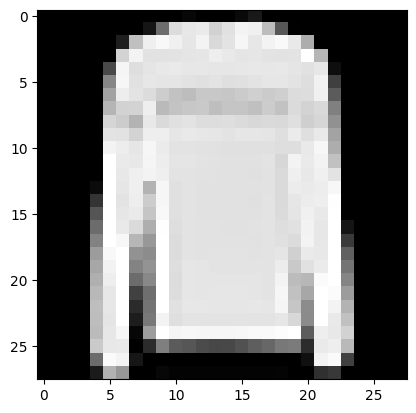

In [9]:
print(y_train[1358], labels_target[y_train[1358]])

plt.imshow(X_train[1358], cmap='gray')

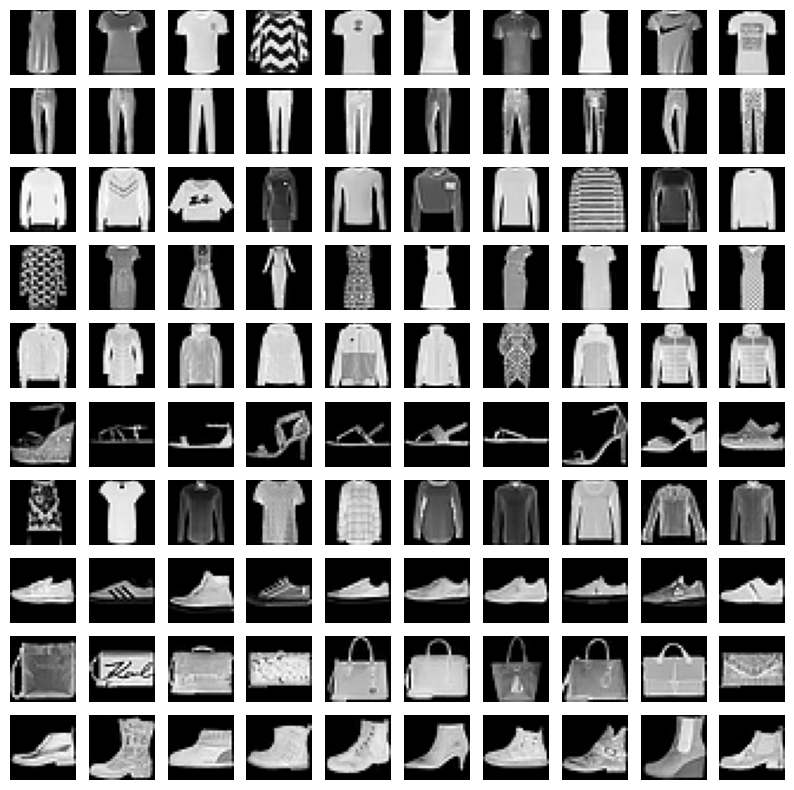

In [10]:
import random

f, ax = plt.subplots(10, 10, figsize=(10,10))

for i, class_name in labels_target.items():
    
    idxs = np.argwhere(y_train==i)
    
    idxs = random.choices(idxs, k = 10)
    
    for n in range(10):
        idx = idxs[n][0]
        features = X_train[idx]
        target = y_train[idx]
        img = features.reshape(28,28)
        ax[i][n].imshow(img, cmap='gray')
        ax[i, n].axis('off')
plt.axis('off')
plt.show()
    

In [11]:
# VAMOS MODELAR COM UM MODELO CLASSICO (KNN - K-VIZINHOS MAIS PROXIMOS)
#matriz(n, n) -> lista(n*n)

In [12]:
X_train[0].shape

(28, 28)

In [13]:
28*28

784

In [14]:
pd.DataFrame(X_train[0].ravel()).T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train_empilhado = X_train.reshape(60000, -1)

In [17]:
X_train_empilhado.shape

(60000, 784)

In [18]:
pd.DataFrame(X_train_empilhado, columns=[f"Pixel_{i+1}" for i in range(X_train_empilhado.shape[1])])

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_train_empilhado = X_train.reshape(60000, -1)/255
X_test_empilhado = X_test.reshape(10000, -1)/255

In [21]:
X_train_empilhado.max()

1.0

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
model = knn.fit(X_train_empilhado, y_train)

In [25]:
y_pred = model.predict(X_test_empilhado)

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

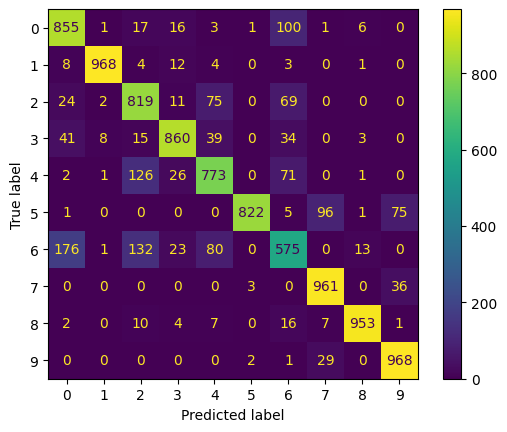

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [29]:
#REDE NEURAL CONVOLUCIONAL

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train_cnn = X_train.reshape(60000, 28, 28, 1)
X_test_cnn = X_test.reshape(10000, 28, 28, 1)

X_train_cnn.shape

(60000, 28, 28, 1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
cnn = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                 MaxPool2D((2,2)),
                 Flatten(), # a partir daqui começa as camadas de "classificação"
                 Dense(100, activation='relu'),
                 Dense(10, activation='softmax')])



In [34]:
cnn.compile(loss="sparse_categorical_crossentropy",
           optimizer="adam",
           metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [35]:
cnn.fit(X_train_cnn, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.8338 - accuracy: 0.8447
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2928 - accuracy: 0.8952
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2557 - accuracy: 0.9071
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2299 - accuracy: 0.9162
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2100 - accuracy: 0.9218


313/313 [==============================] - 2s 5ms/step


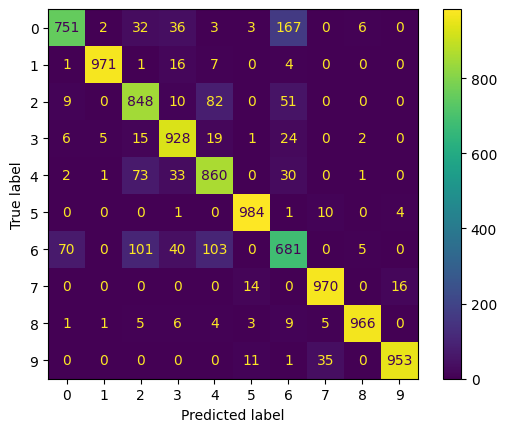

In [36]:
y_pred = cnn.predict(X_test_cnn).argmax(axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.85      0.82      1000
           3       0.87      0.93      0.90      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.70      0.68      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [39]:
import pickle

In [40]:
with open('storage/traffic-signs-data/train.p', mode='rb') as train_data:
    train = pickle.load(train_data)
with open('storage/traffic-signs-data/test.p', mode='rb') as test_data:
    test = pickle.load(test_data)
with open('storage/traffic-signs-data/valid.p', mode='rb') as valid_data:
    valid = pickle.load(valid_data)

In [47]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [48]:
X_train.shape

(34799, 32, 32, 3)

4

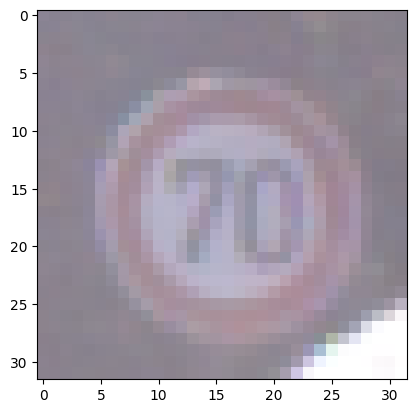

In [53]:
i = 7654

plt.imshow(X_train[i])
y_train[i]

In [54]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [55]:
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid / 3, axis=3, keepdims=True)

In [56]:
X_train_gray.shape

(34799, 32, 32, 1)

5

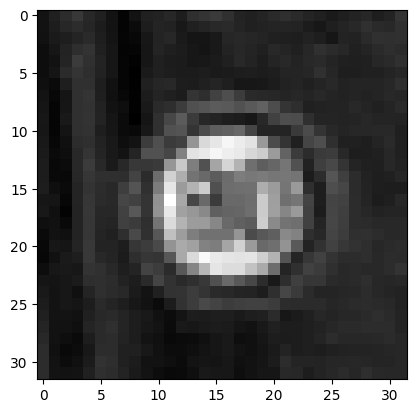

In [58]:
i = 7654

plt.imshow(X_train_gray[i], cmap='gray')
y_train[i]

In [59]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

5

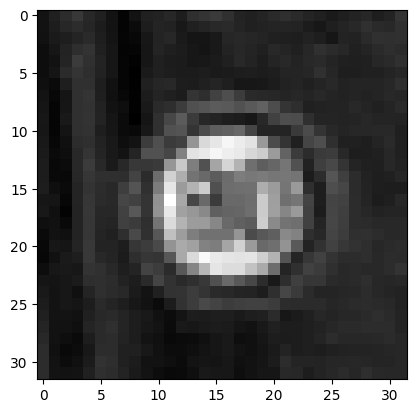

In [60]:
i = 7654

plt.imshow(X_train_gray_norm[i], cmap='gray')
y_train[i]

In [62]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [71]:
#LeNet -> CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D

LeNet = Sequential()

In [72]:
LeNet.add(Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(AveragePooling2D())

LeNet.add(Conv2D(16, (5,5), activation='relu'))
LeNet.add(AveragePooling2D())

LeNet.add(Flatten()) #TINHA ESQUECIDO ISSO AQUI

LeNet.add(Dense(120, activation='relu'))
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_4 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [73]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=10, validation_data = (X_valid_gray_norm, y_valid))

Epoch 1/10
70/70 [==============================] - 7s 90ms/step - loss: 3.1583 - accuracy: 0.1747 - val_loss: 2.6860 - val_accuracy: 0.3034
Epoch 2/10
70/70 [==============================] - 6s 81ms/step - loss: 1.6948 - accuracy: 0.5210 - val_loss: 1.5357 - val_accuracy: 0.5433
Epoch 3/10
70/70 [==============================] - 6s 86ms/step - loss: 0.9605 - accuracy: 0.7171 - val_loss: 1.0962 - val_accuracy: 0.6701
Epoch 4/10
70/70 [==============================] - 6s 91ms/step - loss: 0.6833 - accuracy: 0.8054 - val_loss: 0.9247 - val_accuracy: 0.7245
Epoch 5/10
70/70 [==============================] - 6s 84ms/step - loss: 0.5357 - accuracy: 0.8492 - val_loss: 0.8134 - val_accuracy: 0.7664
Epoch 6/10
70/70 [==============================] - 6s 93ms/step - loss: 0.4463 - accuracy: 0.8748 - val_loss: 0.7745 - val_accuracy: 0.7830
Epoch 7/10
70/70 [==============================] - 6s 83ms/step - loss: 0.3834 - accuracy: 0.8943 - val_loss: 0.7477 - val_accuracy: 0.7930
Epoch 8/10
22

In [69]:
y_train

array([38, 14, 26, ..., 30,  2, 14], dtype=uint8)